<a href="https://colab.research.google.com/github/shreeshailaya/Python-/blob/master/NewsScraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter share name:-  icici
https://www.bing.com/news/search?q=icici+share&qs=n&form=NWRFSH
Title:- ICICI Bank, IndusInd Bank share prices tank up to 10%; check what’s fueling fall in bank stocks
Source/Time:- The Financial Express4d
________________________________________________________________________________
Title:- Buy JK Lakshmi Cement; target of Rs 260: ICICI Direct
Source/Time:- moneycontrol.com11h
________________________________________________________________________________
Title:- Buy HCL Technologies; target of Rs 585: ICICI Direct
Source/Time:- moneycontrol.com14h
________________________________________________________________________________
Title:- Why ICICI Bank share price closed 5% today despite 26% rise in Q4 net profit
Source/Time:- Business Today11d
________________________________________________________________________________
Title:- Share Market Highlights: Sensex ends 740 points down from day’s high, Nifty settles below 9,250; ICICI Bank slips 5%
Source/Time

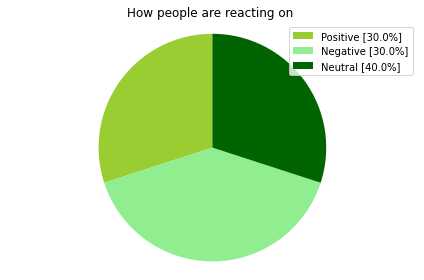

In [43]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from textblob import TextBlob

def precentage(part, whole):
  return 100*float(part)/float(whole)

name=input('Enter share name:-  ')
share=name+'+share'

url='https://www.bing.com/news/search?q='+ name +'+share&qs=n&form=NWRFSH'
print(url)


headers={
    "User-Agent":'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:68.0) Gecko/20100101 Firefox/68.0'
}
page=requests.get(url, headers)
soup=BeautifulSoup(page.content,'html.parser')
noOfSearch=10
positive = 0
negative = 0 
neutral = 0
polarity = 0
for x in range (noOfSearch):
  title=soup.findAll('a',{'class':'title'})[x]
  print('Title:-',title.text)
  analysis =TextBlob(title.text)

  source=soup.findAll('div',{'class':'source'})[x]
  print('Source/Time:-', source.text)



  print("________________________________________________________________________________")



  polarity += analysis.sentiment.polarity

  if (analysis.sentiment.polarity == 0.000):
    neutral += 1

  elif (analysis.sentiment.polarity < 0.000):
    negative += 1

  elif (analysis.sentiment.polarity > 0.000):
    positive += 1  

positive = precentage(positive, noOfSearch)  
negative = precentage(negative, noOfSearch)  
neutral = precentage(neutral, noOfSearch)  

print(polarity)

if (polarity==0):
  print ('Neutral')
elif (polarity < 0.000):
  print('Negative')
elif(polarity>0.000):
  print('Posative') 


labels = ['Positive [' + str(positive) + '%]', 'Negative [' + str(negative) + '%]', 'Neutral [' + str(neutral) + '%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen','lightgreen','darkgreen']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches, labels, loc="best")
plt.title('How people are reacting on ')
plt.axis('equal')
plt.tight_layout()
plt.show()
